In [1]:
from numpy import *
from scipy.stats import norm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    t = 0
    d1 = (np.log(S0/K) + (r + (sigma**2)/2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = d1 - sigma * (np.sqrt(T-t))
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * (np.exp(-r * (T-t)))
    p = norm.cdf(-d2) * K * (np.exp(-r * (T-t))) - norm.cdf(-d1) * S0
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps+1,numPaths))
    # delta_t is the time increment
    delta_t = T / numSteps
    # initial price of paths
    paths[0] = [S0]*numPaths

    for i in range(numPaths):
        for j in range(numSteps):
            # using GBM
            paths[j+1,i] = paths[j,i]*np.exp((mu-0.5*sigma**2)*delta_t + sigma * np.sqrt(delta_t)*np.random.normal(0,1))
    
    c_payoff_T = np.zeros((numPaths,1))
    p_payoff_T = np.zeros((numPaths,1))

    # calculate payoff for each path and then discount it back 
    for i in range(numPaths):
        #for call, payoff only if the exercise price is less than the spot price 
        c_payoff_T[i] = np.maximum(paths[numSteps,i]-K,0)*np.exp(-r*T)
        #for put, payoff only if the exercise price is larger than the spot price 
        p_payoff_T[i] = np.maximum(K - paths[numSteps,i],0)*np.exp(-r*T)
      
    c = np.mean(c_payoff_T)
    p = np.mean(p_payoff_T)
    return c, p, paths

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps+1,numPaths))
    # delta_t is the time increment
    delta_t = T / numSteps
    # initial price of paths
    paths[0] = [S0]*numPaths

    for i in range(numPaths):
        for j in range(numSteps):
            # using GBM
            paths[j+1,i] = paths[j,i]*np.exp((mu-0.5*sigma**2)*delta_t + sigma * np.sqrt(delta_t)*np.random.normal(0,1))
    
    c_payoff_T = np.zeros((numPaths,1))
    p_payoff_T = np.zeros((numPaths,1))
    buffer = np.zeros((numPaths,1))

    # calculate payoff for each path and then discount it back 
    for i in range(numPaths):
        # the option becomes a standard European option if the barrier was crossed some time before expiration, otherwise the payoff is zero
        buffer[i] = np.sum(paths[:,i]>=Sb)
        if buffer[i] > 0:
            #for call, payoff only if the exercise price is less than the spot price 
            c_payoff_T[i] = np.maximum(paths[numSteps,i]-K,0)*np.exp(-r*T)
            #for put, payoff only if the exercise price is larger than the spot price 
            p_payoff_T[i] = np.maximum(K - paths[numSteps,i],0)*np.exp(-r*T)
        else:
            c_payoff_T[i] = 0
            p_payoff_T[i] = 0

    c = np.mean(c_payoff_T)
    p = np.mean(p_payoff_T)
    return c, p

In [4]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 12;
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_path_one_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_path_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.013348701523022
One-step MC price of an European put option is 7.944489916274979
Multi-step MC price of an European call option is 7.968374503974807
Multi-step MC price of an European put option is 7.947938822443103
One-step MC price of an Barrier call option is 7.815154694697986
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.98973434236101
Multi-step MC price of an Barrier put option is 1.2634026721573544


## One Step MC plot

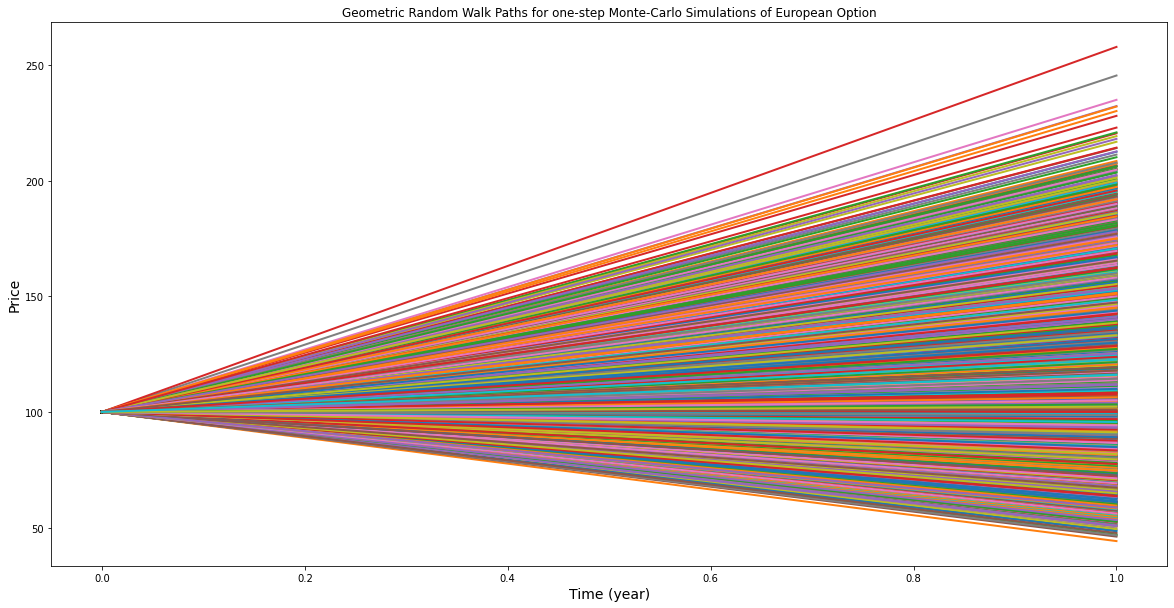

In [5]:
plt.figure(figsize = (20,10))
[plt.plot(MC_path_one_step[:,i], linewidth = 2) for i in range(numPaths)]
plt.ylabel("Price", fontsize = 14)
plt.xlabel("Time (year)", fontsize = 14)
plt.title('Geometric Random Walk Paths for one-step Monte-Carlo Simulations of European Option')
plt.show()

## Multi step MC plot

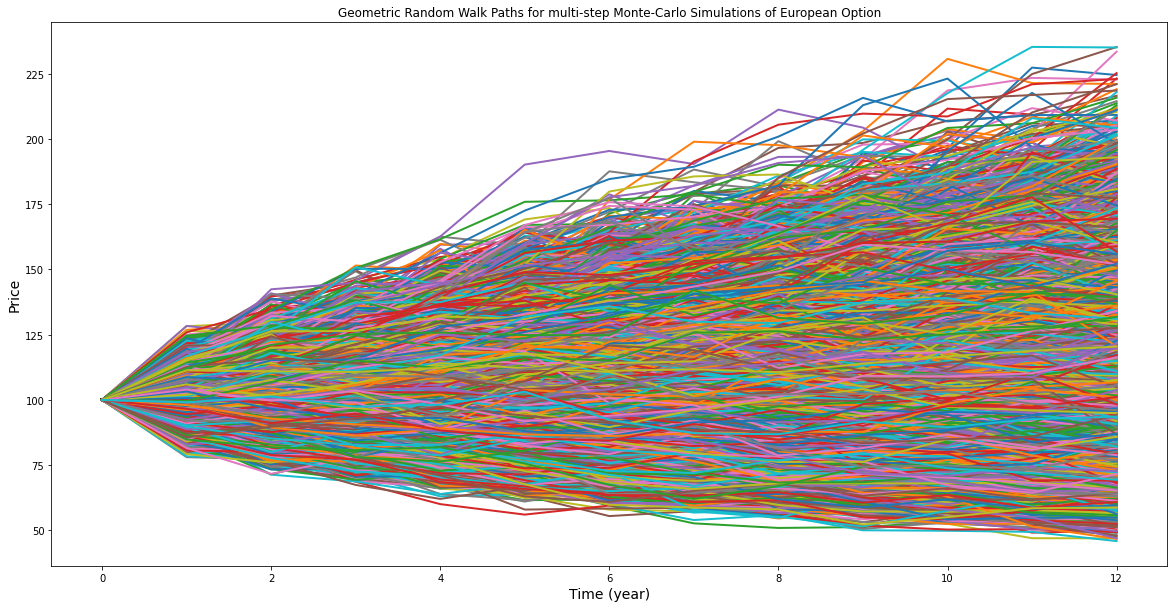

In [6]:
plt.figure(figsize = (20,10))
[plt.plot(MC_path_multi_step[:,i], linewidth = 2) for i in range(numPaths)]
plt.ylabel("Price", fontsize = 14)
plt.xlabel("Time (year)", fontsize = 14)
plt.title('Geometric Random Walk Paths for multi-step Monte-Carlo Simulations of European Option')
plt.show()

## Compute prices of Barrier options with volatility increased and decreased by 10% from the original inputs.

In [7]:
# volatility increased by 10%
callMC_Barrier_Knockin_Price_1_step_volin, putMC_Barrier_Knockin_Price_1_step_volin = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

callMC_Barrier_Knockin_Price_multi_step_volin, putMC_Barrier_Knockin_Price_multi_step_volin = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

# volatility decreased by 10%
callMC_Barrier_Knockin_Price_1_step_volde, putMC_Barrier_Knockin_Price_1_step_volde = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)

callMC_Barrier_Knockin_Price_multi_step_volde, putMC_Barrier_Knockin_Price_multi_step_volde = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_volin)) 
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_volin)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_volin)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_volin)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_volde)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_volde)) 
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_volde)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_volde))

One-step MC price of an Barrier call option with volatility increased by 10% is 8.731139098885905
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.720493058972972
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.5900349522724657
One-step MC price of an Barrier call option with volatility decreased by 10% is 7.033763312122557
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.165522454837835
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.9870173901600907


## Design your own procedure for choosing a number of time steps and a number of scenarios in Monte Carlo pricing for European option to get the same price (up to the cent) as given by the Black-Scholes formula.

In [17]:
# choosing number of steps 

steps_list = [1, 2, 4, 8, 12, 24]
step_call_residual_opti = 0.01 # set an residual threshold for call price
step_put_residual_opti = 0.01 # set an residual threshold for put price
step_call_optimal = 0
step_put_optimal = 0

for i in steps_list:

    step_call_price, step_put_price, step_opti_path = MC_european_price(S0, K, T, r, mu, sigma, i, numPaths)
    step_call_residual = abs(step_call_price-call_BS_European_Price)
    step_put_residual = abs(step_put_price-putBS_European_Price)
    
    if (step_call_residual <= step_call_residual_opti):
        step_call_residual_opti = step_call_residual
        step_call_optimal = i
        step_call_price_opti = step_call_price
        
    if (step_put_residual <= step_put_residual_opti):
        step_put_residual_opti = step_put_residual
        step_put_optimal = i
        step_put_price_opti = step_put_price

In [9]:
# choosing number of scenarios 

paths_list = [100, 1000, 5000, 10000, 100000, 1000000, 10000000]
path_call_residual_opti = 0.01 # set an residual threshold for call price
path_put_residual_opti = 0.01 # set an residual threshold for put price

for i in paths_list:

    path_call_price, path_put_price, path_opti_path = MC_european_price(S0, K, T, r, mu, sigma, 1, i)
    path_call_residual = abs(path_call_price-call_BS_European_Price)
    path_put_residual = abs(path_put_price-putBS_European_Price)
    
    if (path_call_residual <= path_call_residual_opti):
        path_call_residual_opti = path_call_residual
        path_call_optimal = i
        path_call_price_opti = path_call_price
        
    if (path_put_residual <= path_put_residual_opti):
        path_put_residual_opti = path_put_residual
        path_put_optimal = i
        path_put_price_opti = path_put_price

In [19]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))

print('optimal number of time-steps:', max(step_call_optimal, step_put_optimal))
print('With optimal number of time-steps, the MC price of an European call option is ' + str(step_call_price_opti)) 
print('With optimal number of time-steps, the MC price of an European put option is ' + str(step_put_price_opti)) 
print('Optimal number of scenarios:', max(path_call_optimal,path_put_optimal))
print('With optimal number of scenarios, the MC price of an European call option is ' + str(path_call_price_opti)) 
print('With optimal number of scenarios, the MC price of an European put option is ' + str(path_put_price_opti)) 

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
optimal number of time-steps: 24
With optimal number of time-steps, the MC price of an European call option is 8.020679987366503
With optimal number of time-steps, the MC price of an European put option is 7.901844103765272
Optimal number of scenarios: 10000000
With optimal number of scenarios, the MC price of an European call option is 8.02107503953145
With optimal number of scenarios, the MC price of an European put option is 7.9034095360835295
